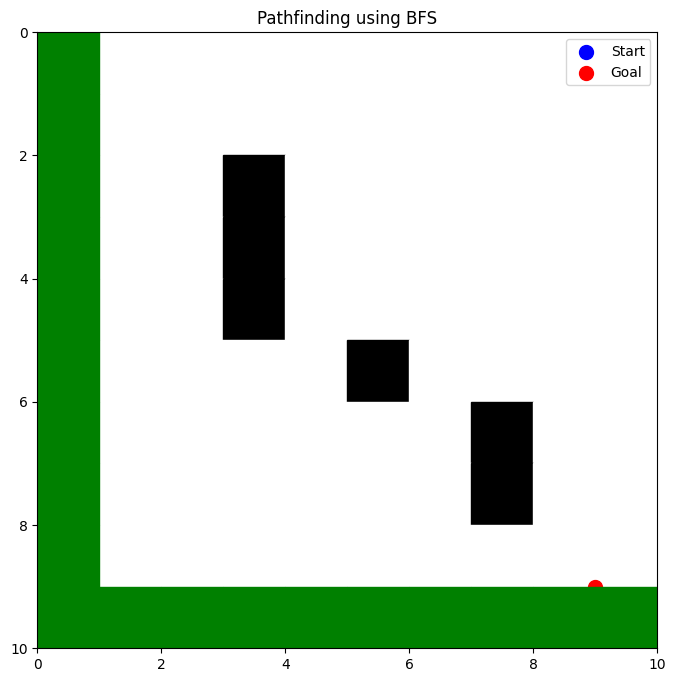

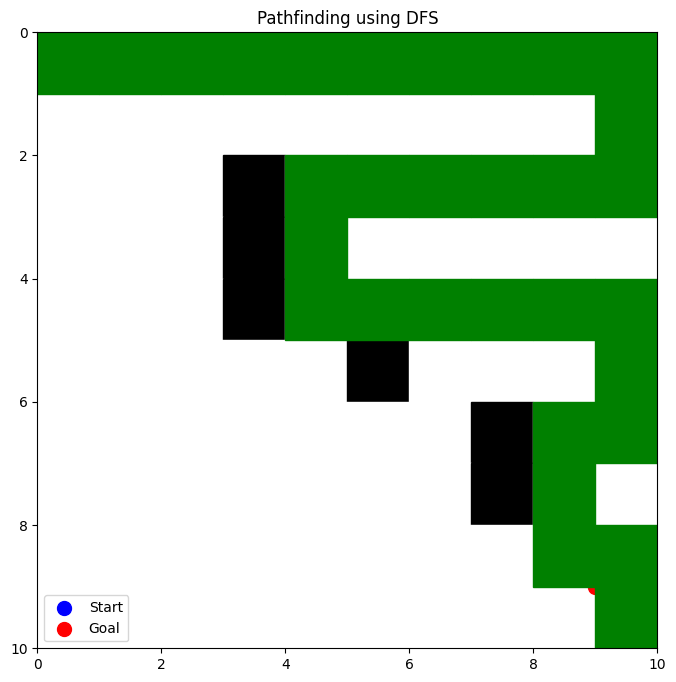

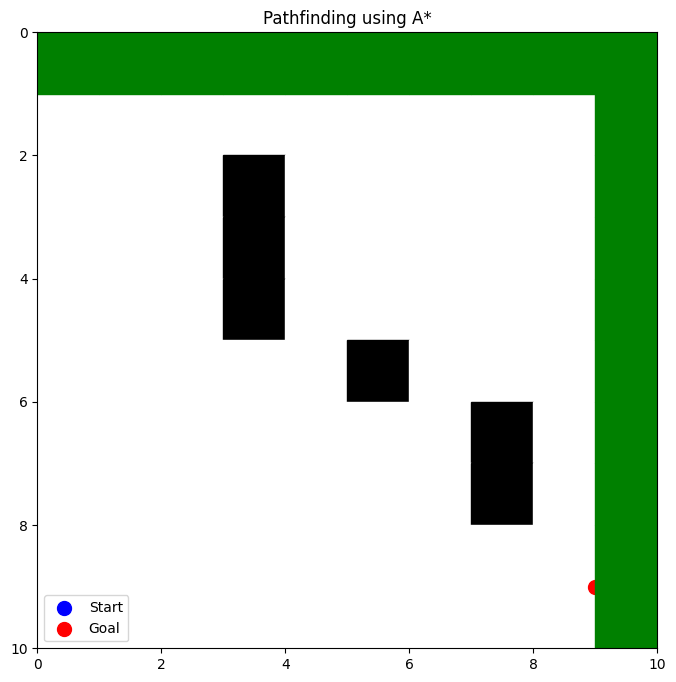

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import heapq

# Grid size
GRID_SIZE = 10
# Directions (Up, Down, Left, Right)
DIRECTIONS = [(-1, 0), (1, 0), (0, -1), (0, 1)]
OBSTACLE = 1
FREE_SPACE = 0

# Grid initialization (10x10 grid of zeros)
grid = np.zeros((GRID_SIZE, GRID_SIZE))


# Heuristic function for A* (Manhattan Distance)
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


# BFS Algorithm
def bfs(start, goal):
    queue = deque([start])
    came_from = {start: None}
    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path(came_from, current)
        for direction in DIRECTIONS:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if is_valid_move(neighbor):
                if neighbor not in came_from:
                    queue.append(neighbor)
                    came_from[neighbor] = current
    return []  # No path found


# DFS Algorithm
def dfs(start, goal):
    stack = [start]
    came_from = {start: None}
    while stack:
        current = stack.pop()
        if current == goal:
            return reconstruct_path(came_from, current)
        for direction in DIRECTIONS:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if is_valid_move(neighbor):
                if neighbor not in came_from:
                    stack.append(neighbor)
                    came_from[neighbor] = current
    return []  # No path found


# A* Algorithm
def a_star(start, goal):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), start))
    g_score = {start: 0}
    came_from = {start: None}
    while open_set:
        _, current = heapq.heappop(open_set)
        if current == goal:
            return reconstruct_path(came_from, current)
        for direction in DIRECTIONS:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if is_valid_move(neighbor):
                tentative_g_score = g_score[current] + 1
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score, neighbor))
                    came_from[neighbor] = current
    return []  # No path found


# Check if a position is valid (within grid and not an obstacle)
def is_valid_move(pos):
    return 0 <= pos[0] < GRID_SIZE and 0 <= pos[1] < GRID_SIZE and grid[pos[0], pos[1]] != OBSTACLE


# Reconstruct the path from start to goal
def reconstruct_path(came_from, current):
    path = []
    while current is not None:
        path.append(current)
        current = came_from[current]
    return path[::-1]  # Reverse path to get from start to goal


# Visualization function for the grid
def plot_grid(start, goal, path, algorithm):
    plt.figure(figsize=(8, 8))
    
    # Draw the grid
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            color = 'white' if grid[i, j] == 0 else 'black'
            plt.gca().add_patch(plt.Rectangle((j, i), 1, 1, color=color))
    
    # Mark the start and goal positions
    plt.scatter(start[1], start[0], color="blue", s=100, label="Start")
    plt.scatter(goal[1], goal[0], color="red", s=100, label="Goal")
    
    # Mark the path
    for p in path:
        plt.gca().add_patch(plt.Rectangle((p[1], p[0]), 1, 1, color="green"))
    
    # Title and labels
    plt.title(f"Pathfinding using {algorithm}")
    plt.legend()
    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()


# Main function to run algorithms and visualize
def main():
    start = (0, 0)  # Start point
    goal = (9, 9)   # Goal point
    
    # Add obstacles to the grid
    grid[2, 3] = OBSTACLE
    grid[3, 3] = OBSTACLE
    grid[4, 3] = OBSTACLE
    grid[5, 5] = OBSTACLE
    grid[6, 7] = OBSTACLE
    grid[7, 7] = OBSTACLE
    
    # Run BFS
    path_bfs = bfs(start, goal)
    plot_grid(start, goal, path_bfs, "BFS")

    # Run DFS
    path_dfs = dfs(start, goal)
    plot_grid(start, goal, path_dfs, "DFS")
    
    # Run A* Algorithm
    path_a_star = a_star(start, goal)
    plot_grid(start, goal, path_a_star, "A*")


if __name__ == "__main__":
    main()
